In [2]:
import numpy as np
import matplotlib.pyplot as plt

# From Biggs and Graves (1962)

In [3]:
nan_ = np.nan
cp = 1.0030

In [199]:
Tmax = np.asarray([86.0,56.0,47.0,55.0,61.0,72.0,78.0,80.0,79.0,72.0,57.0,68.0,78.0,75.0,71.0,58.0,50.0,49.0,49.0,52.0,59.0,80.0,72.0,72.0,71.0,77.0,58.0,71.0,75.0,82.0,78.0])
Tlak = np.asarray([52.0,53.0,53.0,53.0,52.0,51.0,51.0,51.0,52.0,54.0,55.0,55.0,55.0,55.0,56.0,56.0,58.0,56.0,55.0,54.0,53.0,53.0,52.0,53.0,55.0,54.0,55.0,57.0,56.0,56.0,57.0])
Uknt = np.asarray([11.4,16.1,nan_,14.1,11.3, 7.4,14.1,17.0,14.0,15.1,11.9, 3.4,11.9,11.1,18.7,11.1,nan_,nan_,nan_,nan_,17.7,15.9,15.0, 9.6,14.7,19.3,16.4, 6.4,11.7, 6.9,10.1])


In [200]:
TmaxK = (Tmax+459.67)*(5.0/9.0)
TlakK = (Tlak+459.67)*(5.0/9.0)
Umps = Uknt*0.514444

del_t = TmaxK-TlakK
del_t[np.where(del_t<0.0)] = np.nan

print(np.nanmin(TmaxK), np.nanmax(TmaxK),np.nanmax(TmaxK) - np.nanmin(TmaxK))
print(np.nanmin(del_t), np.nanmax(del_t),np.nanmax(del_t) - np.nanmin(del_t))
print(np.nanmin(Umps), np.nanmax(Umps),np.nanmax(Umps) - np.nanmin(Umps))


281.48333333333335 303.15000000000003 21.666666666666686
1.1111111111110858 18.888888888888914 17.77777777777783
1.7491096 9.928769200000001 8.1796596


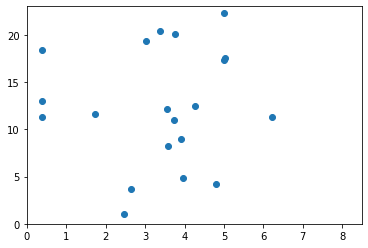

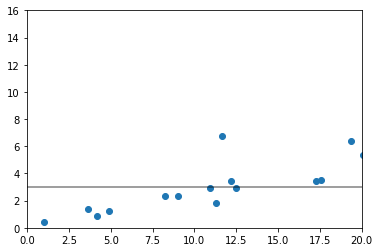

86.0	52.0	11.4	11.3	6.2	1.8
56.0	53.0	16.1	23.9	0.6	41.0
47.0	53.0	nan	nan	nan	nan
55.0	53.0	14.1	18.3	0.4	47.2
61.0	52.0	11.3	11.6	1.7	6.7
72.0	51.0	7.4	4.9	3.9	1.2
78.0	51.0	14.1	17.6	5.0	3.5
80.0	51.0	17.0	25.4	5.4	4.7
79.0	52.0	14.0	17.3	5.0	3.4
72.0	54.0	15.1	20.4	3.4	6.0
57.0	55.0	11.9	13.0	0.4	33.6
68.0	55.0	3.4	1.0	2.5	0.4
78.0	55.0	11.9	12.5	4.3	2.9
75.0	55.0	11.1	10.9	3.7	2.9
71.0	56.0	18.7	31.3	2.8	11.1
58.0	56.0	11.1	11.3	0.4	29.3
50.0	58.0	nan	nan	nan	nan
49.0	56.0	nan	nan	nan	nan
49.0	55.0	nan	nan	nan	nan
52.0	54.0	nan	nan	nan	nan
59.0	53.0	17.7	28.7	1.2	24.8
80.0	53.0	15.9	22.2	5.0	4.4
72.0	52.0	15.0	20.1	3.8	5.3
72.0	53.0	9.6	8.2	3.6	2.3
71.0	55.0	14.7	19.3	3.0	6.4
77.0	54.0	19.3	33.0	4.3	7.7
58.0	55.0	16.4	24.7	0.6	42.6
71.0	57.0	6.4	3.7	2.6	1.4
75.0	56.0	11.7	12.2	3.6	3.4
82.0	56.0	6.9	4.2	4.8	0.9
78.0	57.0	10.1	9.0	3.9	2.3


In [198]:
u2_cpT    = (1e2)*(Umps**2.0/(cp*TmaxK))
delT_T    = (1e2)*(del_t/TmaxK)
u2_cpdelT = (Umps**2.0/(cp*del_t))

plt.scatter(delT_T,u2_cpT)
#plt.plot(np.arange(0,30),3.0*np.arange(0,30),c='k',alpha=0.5)
plt.xlim(0,8.5)
plt.ylim(0,23)
plt.show()

plt.scatter(u2_cpT,u2_cpdelT)
plt.axhline(3.0,c='k',alpha=0.5)
plt.xlim(0,20)
plt.ylim(0,16)
plt.show()

for tt,tm in enumerate(Tmax):
    print('{0:3.1f}\t{1:3.1f}\t{2}\t{3:3.1f}\t{4:3.1f}\t{5:3.1f}'.format(tm,Tlak[tt],Uknt[tt],u2_cpT[tt],delT_T[tt],u2_cpdelT[tt]))

# Lek (1995) Profile method
    In greater detail, each variable is divided into a certain number of equal intervals between its
    minimum and maximum values. The chosen number of intervals is called the scale. 
    
    All variables except one are set initially, (as many times as required for each scale), at their minimum values,
    then successively at their first quartile, median, third quartile and maximum. For each variable
    studied, five values for each of the scale’s points are obtained. These five values are reduced to the
    median value. Then the profile of the output variable can be plotted for the scale’s values of
    the variable considered. The same calculations can then be repeated for each of the other variables.
    For each variable, a curve is then obtained. This gives a set of profiles of the variation of the
    dependent variable according to the increase of the input variables (see Fig. 2 with a scale of variation
    of 12). In this work, a range of the different scales possible was used, so the profiles were plotted for
    scales of 12, 24, 48, 96, 144 and 192.

### Set scales for each variable:

In [8]:
n_points = 10
Tf = np.linspace(270,310,n_points)
DT = np.linspace(1.0,20.0,n_points)
U  = np.linspace(1,10.0,n_points)

### Iterate over values to get profiles:

In [79]:
DT_vals = np.zeros((5,n_points))
for dt,del_t in enumerate(DT):
    u_min = np.min(U)
    u_q1  = np.percentile(U,25)
    u_med = np.percentile(U,50)
    u_q3  = np.percentile(U,75)
    u_max = np.max(U)
    
    DT_vals[0,dt] = (u_min**2)/(cp*del_t)
    DT_vals[1,dt] = (u_q1**2)/(cp*del_t)
    DT_vals[2,dt] = (u_med**2)/(cp*del_t)
    DT_vals[3,dt] = (u_q3**2)/(cp*del_t)
    DT_vals[4,dt] = (u_max**2)/(cp*del_t)
    

U_vals = np.zeros((5,n_points))
for uu,u in enumerate(U):
    dt_min = np.min(DT)
    dt_q1  = np.percentile(DT,25)
    dt_med = np.percentile(DT,50)
    dt_q3  = np.percentile(DT,75)
    dt_max = np.max(DT)
    
    U_vals[0,uu] = (u**2)/(cp*dt_min)
    U_vals[1,uu] = (u**2)/(cp*dt_q1)
    U_vals[2,uu] = (u**2)/(cp*dt_med)
    U_vals[3,uu] = (u**2)/(cp*dt_q3)
    U_vals[4,uu] = (u**2)/(cp*dt_max)
print(U_vals)
    

[[9.97008973e-01 3.98803589e+00 8.97308076e+00 1.59521436e+01
  2.49252243e+01 3.58923230e+01 4.88534397e+01 6.38085743e+01
  8.07577268e+01 9.97008973e+01]
 [1.73392865e-01 6.93571460e-01 1.56053578e+00 2.77428584e+00
  4.33482162e+00 6.24214314e+00 8.49625038e+00 1.10971434e+01
  1.40448221e+01 1.73392865e+01]
 [9.49532355e-02 3.79812942e-01 8.54579120e-01 1.51925177e+00
  2.37383089e+00 3.41831648e+00 4.65270854e+00 6.07700707e+00
  7.69121208e+00 9.49532355e+00]
 [6.53776376e-02 2.61510550e-01 5.88398738e-01 1.04604220e+00
  1.63444094e+00 2.35359495e+00 3.20350424e+00 4.18416881e+00
  5.29558864e+00 6.53776376e+00]
 [4.98504487e-02 1.99401795e-01 4.48654038e-01 7.97607178e-01
  1.24626122e+00 1.79461615e+00 2.44267198e+00 3.19042871e+00
  4.03788634e+00 4.98504487e+00]]


### Plot profiles

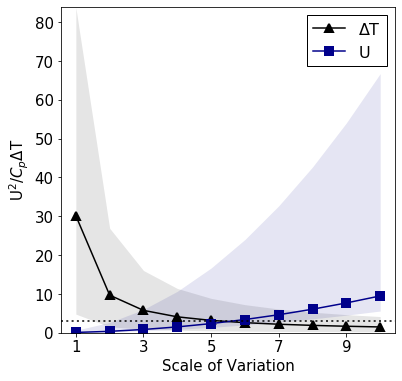

In [119]:
fig = plt.figure(figsize=(6,6))
scale = np.arange(1,n_points+1)
plt.fill_between(scale,np.percentile(DT_vals,10,axis=0),np.percentile(DT_vals,90,axis=0),color='k',alpha=0.1,lw=0.0)
plt.fill_between(scale,np.percentile(U_vals,10,axis=0),np.percentile(U_vals,90,axis=0),color='darkblue',alpha=0.1,lw=0.0)
plt.plot(scale,np.percentile(DT_vals,50,axis=0),marker='^',markeredgecolor='k',c='k',markersize=8,mew=2.0,label='$\Delta$T')
plt.plot(scale,np.percentile(U_vals,50,axis=0),marker='s',markeredgecolor='darkblue',c='darkblue',markersize=8,mew=2.0,label='U')
plt.xlabel('Scale of Variation',size=15)
plt.ylabel('U$^2$/$C_p\Delta$T',size=15)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(1,n_points+1,2))
plt.axhline(3.0,c='k',alpha=0.75,ls=':',lw=2.0)
plt.legend(frameon=True,fontsize=16,framealpha=1.0,edgecolor='k',fancybox=False)
plt.ylim(0,84)
plt.show()

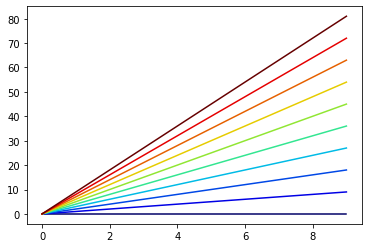

In [103]:
dT_colors = {}
for dt,T in enumerate(DT):
    line_cols = plt.cm.jet(np.linspace(0.0,1.0,len(DT)))[dt]
    darken = 0.1
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    dT_colors[dt] = line_cols
for dt,T in enumerate(DT):
    plt.plot(np.arange(0,10),np.arange(0,10)*dt,c=dT_colors[dt],label=T)
#plt.legend(frameon=False)
plt.show()

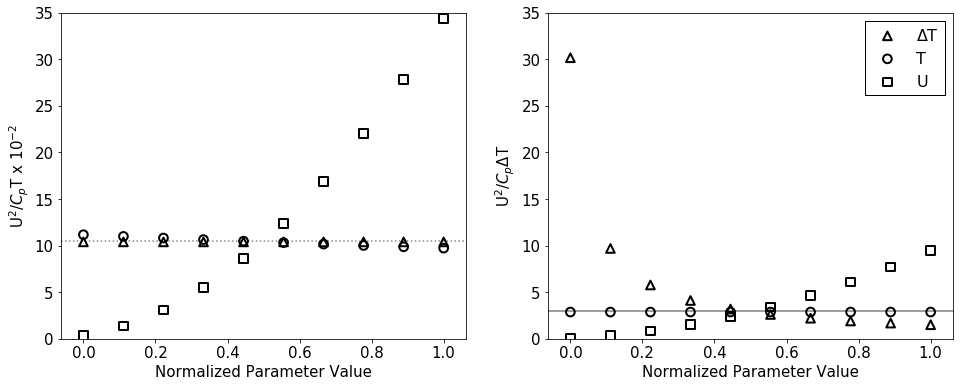

In [27]:
min_c = 'b'
mean_c = 'k'
max_c = 'r'
fig,ax = plt.subplots(ncols=2,figsize=(16,6),sharex=True)
norm_dT = (DT - np.min(DT))
norm_dT = norm_dT/np.max(norm_dT)
show_min_and_max = False

for dt,del_t in enumerate(DT):
    u_min = np.min(U)
    T_min = np.min(Tf)
    u_mean = np.mean(U)
    T_mean = np.mean(Tf)
    u_max = np.max(U)
    T_max = np.max(Tf)
    e_y1_min = ((u_min**2)/(cp*T_min))*1e2
    e_y2_min = (u_min**2)/(cp*del_t)
    e_y1_mean = ((u_mean**2)/(cp*T_mean))*1e2
    e_y2_mean = (u_mean**2)/(cp*del_t)
    e_y1_max = ((u_max**2)/(cp*T_max))*1e2
    e_y2_max = (u_max**2)/(cp*del_t)
    if show_min_and_max:
        ax[0].scatter(norm_dT[dt],e_y1_min,edgecolor=min_c,c='None',marker='^',s=75,lw=2.0)
        ax[0].scatter(norm_dT[dt],e_y1_max,edgecolor=max_c,c='None',marker='^',s=75,lw=2.0)
        ax[1].scatter(norm_dT[dt],e_y2_min,edgecolor=min_c,c='None',marker='^',s=75,lw=2.0)
        ax[1].scatter(norm_dT[dt],e_y2_max,edgecolor=max_c,c='None',marker='^',s=75,lw=2.0)
    if dt == 0: 
        plt_str = '$\Delta$T'
    else:
        plt_str = None   
    ax[0].scatter(norm_dT[dt],e_y1_mean,edgecolor=mean_c,c='None',marker='^',s=75,lw=2.0)
    ax[1].scatter(norm_dT[dt],e_y2_mean,edgecolor=mean_c,c='None',marker='^',s=75,lw=2.0,label=plt_str)
    

norm_T = (Tf - np.min(Tf))
norm_T = norm_T/np.max(norm_T)
for tt,T in enumerate(Tf):
    u_min      = np.min(U)
    del_t_min  = np.min(DT)
    u_mean     = np.mean(U)
    del_t_mean = np.mean(DT)
    u_max      = np.max(U)
    del_t_max  = np.max(DT)
    
    e_y1_min = ((u_min**2)/(cp*T))*1e2
    e_y2_min = (u_min**2)/(cp*del_t_min)
    e_y1_mean = ((u_mean**2)/(cp*T))*1e2
    e_y2_mean = (u_mean**2)/(cp*del_t_mean)
    e_y1_max = ((u_max**2)/(cp*T))*1e2
    e_y2_max = (u_max**2)/(cp*del_t_max)

    if show_min_and_max:
        ax[0].scatter(norm_T[tt],e_y1_min,edgecolor=min_c,c='None',marker='o',s=75,lw=2.0)
        ax[0].scatter(norm_T[tt],e_y1_max,edgecolor=max_c,c='None',marker='o',s=75,lw=2.0)
        ax[1].scatter(norm_T[tt],e_y2_min,edgecolor=min_c,c='None',marker='o',s=75,lw=2.0)
        ax[1].scatter(norm_T[tt],e_y2_max,edgecolor=max_c,c='None',marker='o',s=75,lw=2.0)
    if tt == 0: 
        plt_str = 'T'
    else:
        plt_str = None        
    ax[0].scatter(norm_T[tt],e_y1_mean,edgecolor=mean_c,c='None',marker='o',s=75,lw=2.0)
    ax[1].scatter(norm_T[tt],e_y2_mean,edgecolor=mean_c,c='None',marker='o',s=75,lw=2.0,label=plt_str)
    
    
norm_U = (U - np.min(U))
norm_U = norm_U/np.max(norm_U)
for uu,u in enumerate(U):
    T_min     = np.min(Tf)
    del_t_min = np.min(DT)
    T_mean     = np.mean(Tf)
    del_t_mean = np.mean(DT)
    T_max     = np.max(Tf)
    del_t_max = np.max(DT)
    
    e_y1_min = ((u**2)/(cp*T_min))*1e2
    e_y2_min = (u**2)/(cp*del_t_min)
    e_y1_mean = ((u**2)/(cp*T_mean))*1e2
    e_y2_mean = (u**2)/(cp*del_t_mean)
    e_y1_max = ((u**2)/(cp*T_max))*1e2
    e_y2_max = (u**2)/(cp*del_t_max)

    if show_min_and_max:
        ax[0].scatter(norm_U[uu],e_y1_min,edgecolor=min_c,c='None',marker='s',s=75,lw=2.0)
        ax[0].scatter(norm_U[uu],e_y1_max,edgecolor=max_c,c='None',marker='s',s=75,lw=2.0)
        ax[1].scatter(norm_U[uu],e_y2_min,edgecolor=min_c,c='None',marker='s',s=75,lw=2.0)
        ax[1].scatter(norm_U[uu],e_y2_max,edgecolor=max_c,c='None',marker='s',s=75,lw=2.0)    
    if uu == 0: 
        plt_str = 'U'
    else:
        plt_str = None
    ax[0].scatter(norm_U[uu],e_y1_mean,edgecolor=mean_c,c='None',marker='s',s=75,lw=2.0)
    ax[0].axhline(del_t_mean,c='k',ls=':',alpha=0.05)
    ax[1].scatter(norm_U[uu],e_y2_mean,edgecolor=mean_c,c='None',marker='s',s=75,lw=2.0,label=plt_str)  
    
    #ax[0].scatter(norm_U[uu],e_y1,c=[dT_colors[uu]],marker='d',s=75)
    #ax[1].scatter(norm_U[uu],e_y2,c=[dT_colors[uu]],marker='d',s=75)
#plt.xlim(0,20)
ax[0].set_ylim(0,35)
ax[1].set_ylim(0,35)
ax[0].set_xlabel('Normalized Parameter Value',size=15)
ax[0].set_ylabel('U$^2$/$C_p$T x 10$^{-2}$',size=15)
ax[1].set_xlabel('Normalized Parameter Value',size=15)
ax[1].set_ylabel('U$^2$/$C_p\Delta$T',size=15)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[1].axhline(3.0,c='k',alpha=0.5)
ax[1].legend(frameon=True,fontsize=16,framealpha=1.0,edgecolor='k',fancybox=False)
plt.show()

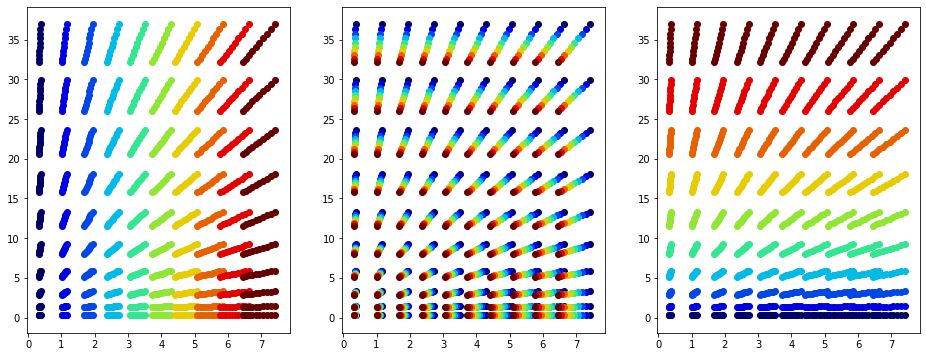

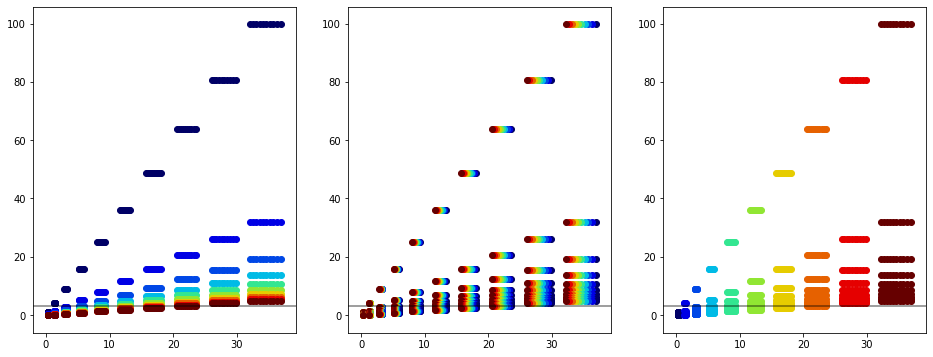

In [283]:
fig,ax = plt.subplots(ncols=3,figsize=(16,6))
for dt,del_t in enumerate(DT):
    for tt,T in enumerate(Tf):
        for uu,u in enumerate(U):
            e_x = (del_t/T)*1e2
            e_y = ((u**2)/(cp*T))*1e2
            ax[0].scatter(e_x,e_y,c=[dT_colors[dt]])
            ax[1].scatter(e_x,e_y,c=[dT_colors[tt]])
            ax[2].scatter(e_x,e_y,c=[dT_colors[uu]])

plt.show()

fig,ax = plt.subplots(ncols=3,figsize=(16,6))
for dt,del_t in enumerate(DT):
    for tt,T in enumerate(Tf):
        for uu,u in enumerate(U):
            e_x = ((u**2)/(cp*T))*1e2
            e_y = (u**2)/(cp*del_t)
            ax[0].scatter(e_x,e_y,c=[dT_colors[dt]])
            ax[1].scatter(e_x,e_y,c=[dT_colors[tt]])
            ax[2].scatter(e_x,e_y,c=[dT_colors[uu]])

ax[0].axhline(3.0,c='k',alpha=0.5)
ax[1].axhline(3.0,c='k',alpha=0.5)
ax[2].axhline(3.0,c='k',alpha=0.5)
plt.show()

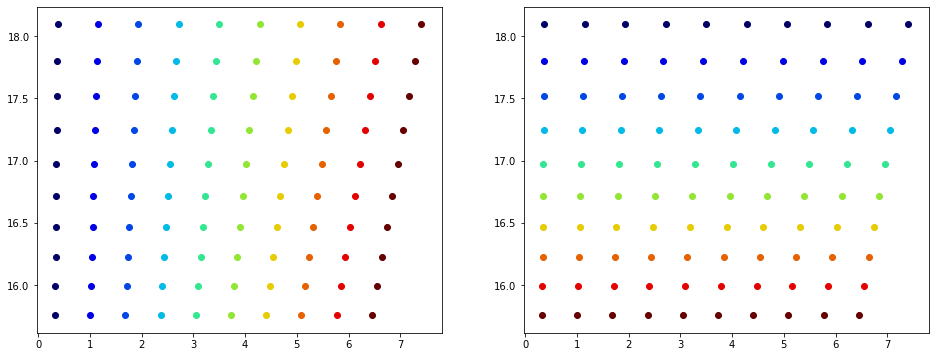

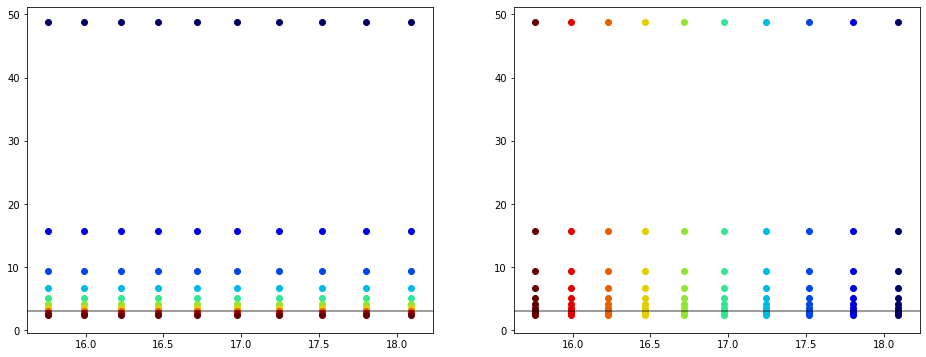

In [281]:
fig,ax = plt.subplots(ncols=2,figsize=(16,6))
for dt,del_t in enumerate(DT):
    for tt,T in enumerate(Tf):
        u = 7.0
        e_x = (del_t/T)*1e2
        e_y = ((u**2)/(cp*T))*1e2
        ax[0].scatter(e_x,e_y,c=[dT_colors[dt]])
        ax[1].scatter(e_x,e_y,c=[dT_colors[tt]])

plt.show()

fig,ax = plt.subplots(ncols=2,figsize=(16,6))
for dt,del_t in enumerate(DT):
    for tt,T in enumerate(Tf):
        u = 7.0
        e_x = ((u**2)/(cp*T))*1e2
        e_y = (u**2)/(cp*del_t)
        ax[0].scatter(e_x,e_y,c=[dT_colors[dt]])
        ax[1].scatter(e_x,e_y,c=[dT_colors[tt]])
#plt.xlim(0,20)
#plt.ylim(0,16)
ax[0].axhline(3.0,c='k',alpha=0.5)
ax[1].axhline(3.0,c='k',alpha=0.5)
plt.show()